# Second work, first Unit

The following code is a approach to the solution of a series of problems involving the all flights in Brazil registered by ANAC (Agência Nacional de Aviação Civil - National Civil Aviation Agency). It is important to emphasize that the data used here contains information about all airports involved in these flights and a undirected graph with the number of flights between two airports.

## 1) About the network's assortativity
This analysis is focused on the assortativity of the network on respect to the 'REGIÃO' attribute of each airport.

We first need to generate from the ```.csv```'s, the graph segmented by the country 'Brazil' and added of its regions.

In [1]:
# import usefull packages
import numpy as np
import nxviz as nv
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# reading the network
G = nx.read_graphml(r'data/air_traffic.graphml')

print(f'This network has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')

This network has 501 nodes and 4439 edges


In [3]:
for node, attr in G.nodes(data=True):
    print(f'Node {node} has {attr}')

Node SWIQ has {'name': 'MINAÇU', 'country': 'BRASIL', 'region': 'CENTRO-OESTE', 'state': 'GO', 'latitude': '-16.253079999999954', 'longitude': '-47.94988999999998'}
Node SNPV has {'name': 'BARCARENA', 'country': 'BRASIL', 'region': 'NORTE', 'state': 'PA', 'latitude': '-30.692516', 'longitude': '-50.557139'}
Node SBSN has {'name': 'SANTARÉM', 'country': 'BRASIL', 'region': 'NORTE', 'state': 'PA', 'latitude': '-2.4247219562530518', 'longitude': '-54.785831451416016'}
Node SWRD has {'name': 'RONDONÓPOLIS', 'country': 'BRASIL', 'region': 'CENTRO-OESTE', 'state': 'MT', 'latitude': '-16.586', 'longitude': '-54.7248'}
Node SBJR has {'name': 'RIO DE JANEIRO', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'RJ', 'latitude': '-22.987499', 'longitude': '-43.369999'}
Node SBST has {'name': 'SANTOS', 'country': 'BRASIL', 'region': 'SUDESTE', 'state': 'SP', 'latitude': '-23.928056716918945', 'longitude': '-46.299720764160156'}
Node SSBN has {'name': 'PORTO ALEGRE', 'country': 'BRASIL', 'region':

As we can see bellow, there are only nodes whose country is Brazil.

In [4]:
brasil = set()
not_brasil = set()

for node, attr in G.nodes(data=True):
    if attr['country'] == 'BRASIL':
        brasil.add(node)
    else:
        not_brasil.add(node)

print(f'Brazil has {len(brasil)} nodes and the other countries {len(not_brasil)} nodes')

Brazil has 501 nodes and the other countries 0 nodes


### Now we can do the proper analysis

In [5]:
nx.attribute_assortativity_coefficient(G, "region")

0.37160996633891646

In [6]:
nx.attribute_mixing_matrix(G, 'region')

array([[0.07096193, 0.03987385, 0.0121649 , 0.00720883, 0.01329128],
       [0.03987385, 0.17481415, 0.03424195, 0.02782158, 0.05507997],
       [0.0121649 , 0.03424195, 0.05384096, 0.02241496, 0.01058797],
       [0.00720883, 0.02782158, 0.02241496, 0.13471503, 0.02061275],
       [0.01329128, 0.05507997, 0.01058797, 0.02061275, 0.07907186]])

Assortativity matrix
[[0.07096193 0.03987385 0.0121649  0.00720883 0.01329128]
 [0.03987385 0.17481415 0.03424195 0.02782158 0.05507997]
 [0.0121649  0.03424195 0.05384096 0.02241496 0.01058797]
 [0.00720883 0.02782158 0.02241496 0.13471503 0.02061275]
 [0.01329128 0.05507997 0.01058797 0.02061275 0.07907186]]


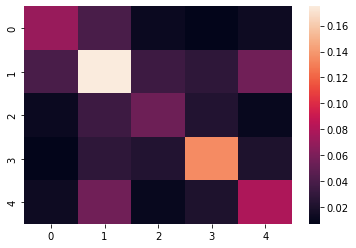

In [7]:
e = nx.attribute_mixing_matrix(G, 'region')

print('Assortativity matrix')
print(e)

sns.heatmap(e)
plt.show()

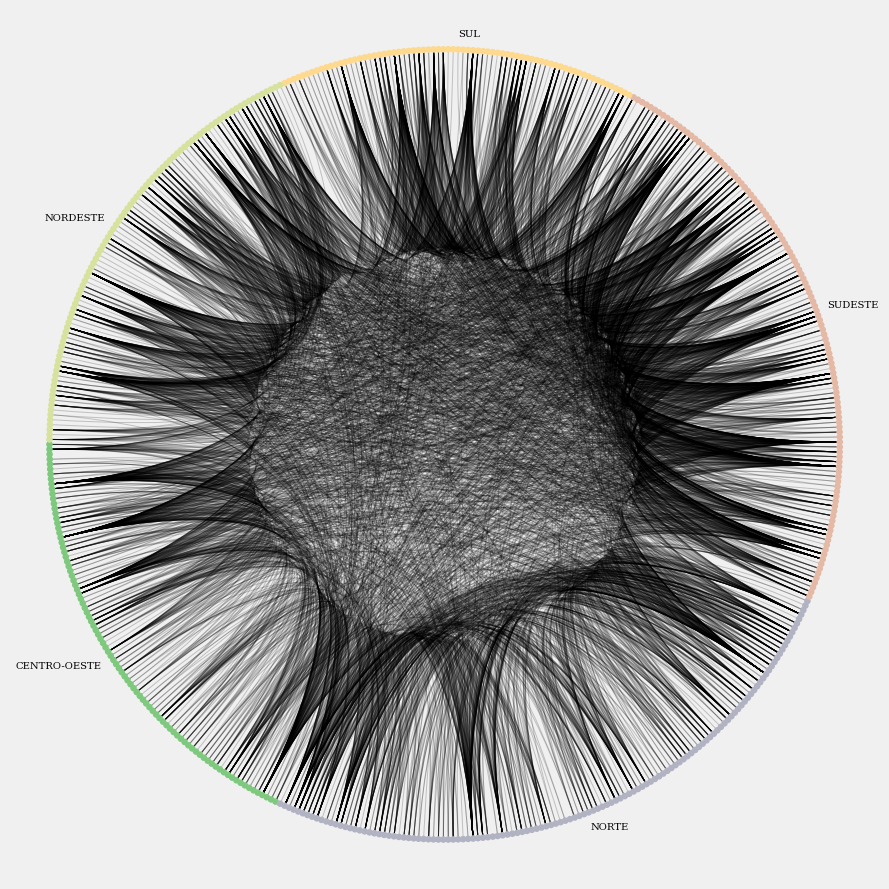

In [35]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="default",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,
                  figsize=(15, 15))

c.draw()

plt.savefig(r"imgs/flights_network.png", 
            format="png",
            transparent=True)

plt.show()

## 2) Analysis of the Air Traffic Network network degree conectivity
In this step, our objective is to make a bivariate analysis on the nodes' degrees and their avarage neighborhoods' degrees. 

In [9]:
nx.degree_assortativity_coefficient(G)

-0.19974209292576134

In [10]:
def graph_degree_avg_neigh_degree(input_Graph: nx.Graph):
    degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(input_Graph).items())
    # convert to list
    degree = list(degree)
    avg_neigh_degree = list(avg_neigh_degree)
    return degree, avg_neigh_degree

In [11]:
list_nodes_norte = []
list_nodes_sul = []
list_nodes_sudeste = []
list_nodes_centro_oeste = []
list_nodes_nordeste = []

for node, atr in G.nodes(data=True):
    if atr['region'].lower() == 'norte':
        list_nodes_norte.append(node)
    elif atr['region'].lower() == 'sul':
        list_nodes_sul.append(node)
    elif atr['region'].lower() == 'sudeste':
        list_nodes_sudeste.append(node)
    elif atr['region'].lower() == 'centro-oeste':
        list_nodes_centro_oeste.append(node)
    elif atr['region'].lower() == 'nordeste':
        list_nodes_nordeste.append(node)

G_norte = G.subgraph(list_nodes_norte)
G_sul = G.subgraph(list_nodes_sul)
G_sudeste = G.subgraph(list_nodes_sudeste)
G_centro_oeste = G.subgraph(list_nodes_centro_oeste)
G_nordeste = G.subgraph(list_nodes_nordeste)

In [12]:
degree_brasil, avg_neigh_degree_brasil = graph_degree_avg_neigh_degree(G)

degree_norte, avg_neigh_degree_norte = graph_degree_avg_neigh_degree(G_norte)
degree_sul, avg_neigh_degree_sul = graph_degree_avg_neigh_degree(G_sul)
degree_sudeste, avg_neigh_degree_sudeste = graph_degree_avg_neigh_degree(G_sudeste)
degree_centro_oeste, avg_neigh_degree_centro_oeste = graph_degree_avg_neigh_degree(G_centro_oeste)
degree_nordeste, avg_neigh_degree_nordeste = graph_degree_avg_neigh_degree(G_nordeste)

/home/alsinaariel/anaconda3/envs/data_flights/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


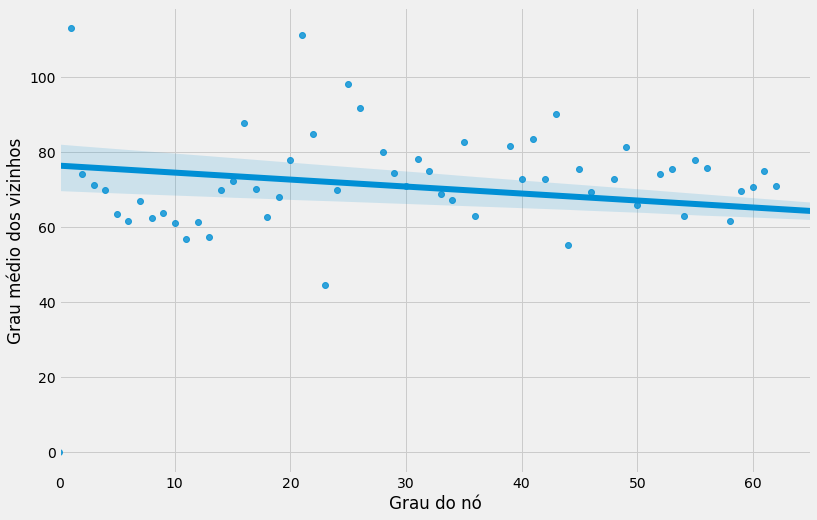

In [13]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.regplot(degree_brasil, avg_neigh_degree_brasil, ax=ax)

ax.set_xlabel("Grau do nó")
ax.set_ylabel("Grau médio dos vizinhos")
ax.set_xlim(0,65)

# Save figure
plt.savefig(r"imgs/degree_assortativity_brasil.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

/home/alsinaariel/anaconda3/envs/data_flights/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/alsinaariel/anaconda3/envs/data_flights/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/alsinaariel/anaconda3/envs/data_flights/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

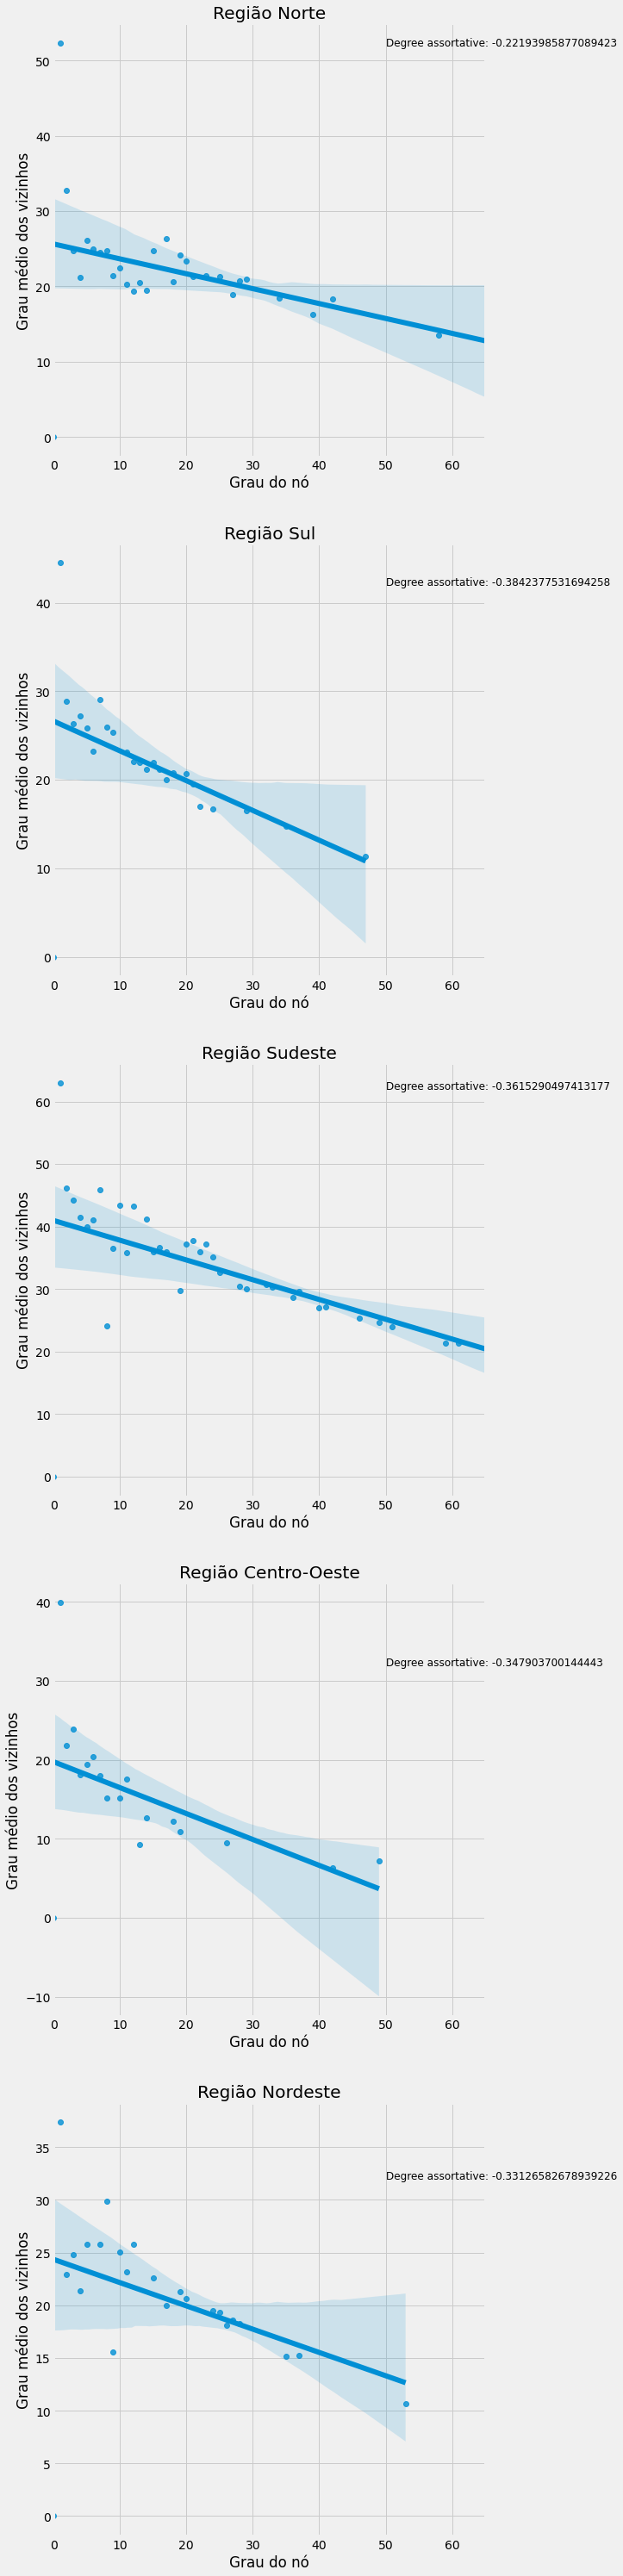

In [14]:
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(8, 50))

ax_norte = fig.add_subplot(5, 1, 1)
ax_sul = fig.add_subplot(5, 1, 2)
ax_sudeste = fig.add_subplot(5, 1, 3)
ax_centro_oeste = fig.add_subplot(5, 1, 4)
ax_nordeste = fig.add_subplot(5, 1, 5)


sns.regplot(degree_norte, avg_neigh_degree_norte, ax=ax_norte)
sns.regplot(degree_sul, avg_neigh_degree_sul, ax=ax_sul)
sns.regplot(degree_sudeste, avg_neigh_degree_sudeste, ax=ax_sudeste)
sns.regplot(degree_centro_oeste, avg_neigh_degree_centro_oeste, ax=ax_centro_oeste)
sns.regplot(degree_nordeste, avg_neigh_degree_nordeste, ax=ax_nordeste)

ax_norte.set_xlabel("Grau do nó")
ax_norte.set_ylabel("Grau médio dos vizinhos")
ax_norte.set_xlim(0,65)

ax_sul.set_xlabel("Grau do nó")
ax_sul.set_ylabel("Grau médio dos vizinhos")
ax_sul.set_xlim(0,65)

ax_sudeste.set_xlabel("Grau do nó")
ax_sudeste.set_ylabel("Grau médio dos vizinhos")
ax_sudeste.set_xlim(0,65)

ax_centro_oeste.set_xlabel("Grau do nó")
ax_centro_oeste.set_ylabel("Grau médio dos vizinhos")
ax_centro_oeste.set_xlim(0,65)

ax_nordeste.set_xlabel("Grau do nó")
ax_nordeste.set_ylabel("Grau médio dos vizinhos")
ax_nordeste.set_xlim(0,65)

ax_norte.set_title("Região Norte")
ax_sul.set_title("Região Sul")
ax_sudeste.set_title("Região Sudeste")
ax_centro_oeste.set_title("Região Centro-Oeste")
ax_nordeste.set_title("Região Nordeste")

ax_norte.text(50, 52, f'Degree assortative: {nx.degree_assortativity_coefficient(G_norte)}', fontsize=12)
ax_sul.text(50, 42, f'Degree assortative: {nx.degree_assortativity_coefficient(G_sul)}', fontsize=12)
ax_sudeste.text(50, 62, f'Degree assortative: {nx.degree_assortativity_coefficient(G_sudeste)}', fontsize=12)
ax_centro_oeste.text(50, 32, f'Degree assortative: {nx.degree_assortativity_coefficient(G_centro_oeste)}', fontsize=12)
ax_nordeste.text(50, 32, f'Degree assortative: {nx.degree_assortativity_coefficient(G_nordeste)}', fontsize=12)

# # Save figure
# plt.savefig(r"imgs/degree_assortativity_brasil.png", 
#             format="png",
#             dpi=400, 
#             bbox_inches="tight",
#             transparent=True)

plt.show()

### 3) Analysis network components conectivity
First we found the connected of the network. As we saw that it had 5 components, but only one was not a single node. So it is th one that matter the most and that will be printed as a bar plot of the percentages of the flights by regions

In [15]:
nx.number_connected_components(G)

5

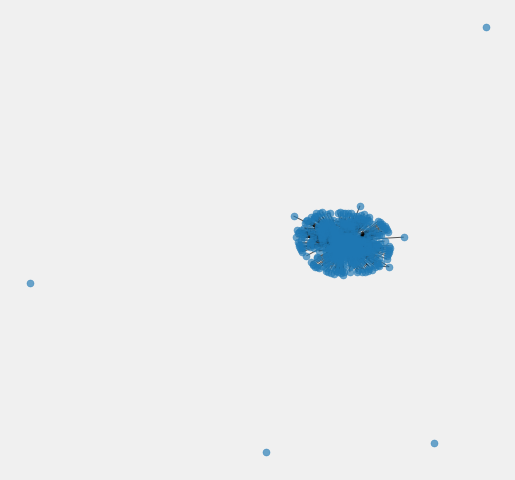

In [16]:
# visualizing the connected components
fig, ax = plt.subplots(1, 1,figsize=(8, 8))
nx.draw_networkx(G, ax=ax, with_labels=False, node_size=50, alpha=0.65, pos=nx.spring_layout(G))
plt.axis("off")
plt.show()

Quantidade de vôos: 497
Quantidade de vôos: 1
Quantidade de vôos: 1
Quantidade de vôos: 1
Quantidade de vôos: 1


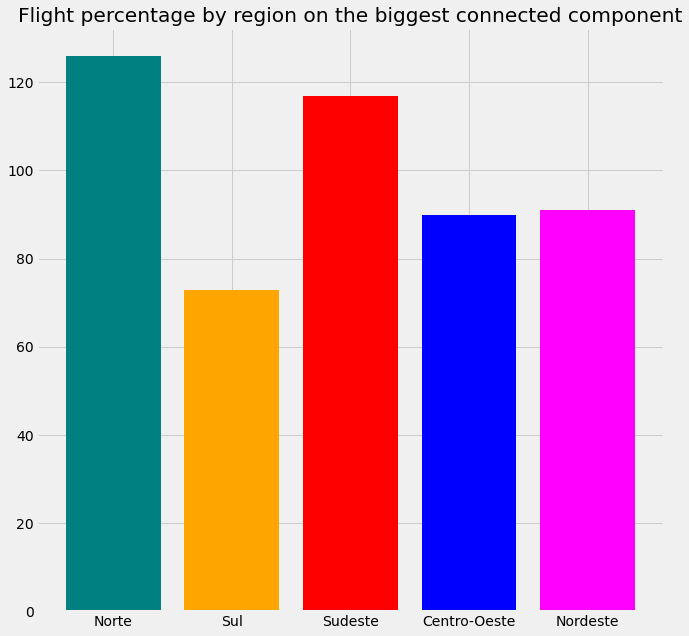

In [17]:
# printing the first connected component
plt.style.use("fivethirtyeight")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)


porcentagem_norte = 0
porcentagem_sul = 0
porcentagem_sudeste = 0
porcentagem_centro_oeste = 0
porcentagem_nordeste = 0

is_printed = False
for component in nx.connected_components(G):
    print(f'Quantidade de vôos: {len(component)}')

    for node in component:
        if node in list_nodes_norte:
            porcentagem_norte += 1
        elif node in list_nodes_sul:
            porcentagem_sul += 1
        elif node in list_nodes_sudeste:
            porcentagem_sudeste += 1
        elif node in list_nodes_centro_oeste:
            porcentagem_centro_oeste += 1
        elif node in list_nodes_nordeste:
            porcentagem_nordeste += 1

    # priting the biggest and only relevant connected component flight percentage
    if not is_printed:
        y = [porcentagem_norte, porcentagem_sul, porcentagem_sudeste, porcentagem_centro_oeste, porcentagem_nordeste]
        ax.bar(['Norte', 'Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste'],
                y, 
                color=['#008080', '#FFA500', '#FF0000', '#0000FF', '#FF00FF']
        )
        ax.set_title('Flight percentage by region on the biggest connected component')
        is_printed = True

    porcentagem_norte = 0
    porcentagem_sul = 0
    porcentagem_sudeste = 0
    porcentagem_centro_oeste = 0
    porcentagem_nordeste = 0

### 4) Paths between airports and their shortest path

In [18]:
def print_trajectory(G: nx.Graph, origin_city: str, dest_city: str, origin_region: str, dest_region: str) -> None:
    '''Descreve o grafo com os trajetos entre as cidades do norte e sul'''
    for city in nx.shortest_path(G, origin_city, dest_city):
        if city == dest_city:
            print(G.nodes[city]['name'])
        else:
            print(G.nodes[city]['name'], end=' -> ')
    print(f'Trajeto de vôos do {origin_region} para o {dest_region}')
    print(f'Distância total: {nx.shortest_path_length(G, origin_city, dest_city)}', end='\n\n')

In [19]:
from random import choice

# Selecionando as cidades aleatórias para a simulação de vôos
cidade_norte = choice(list_nodes_norte)
print(f'Cidade selecionada do Norte para simulação: {G.nodes[cidade_norte]["name"]}')
cidade_sul = choice(list_nodes_sul)
print(f'Cidade selecionada do Sul para simulação: {G.nodes[cidade_sul]["name"]}')
cidade_sudeste = choice(list_nodes_sudeste)
print(f'Cidade selecionada do Sudeste para simulação: {G.nodes[cidade_sudeste]["name"]}')
cidade_centro_oeste = choice(list_nodes_centro_oeste)
print(f'Cidade selecionada do Centro-Oeste para simulação: {G.nodes[cidade_centro_oeste]["name"]}')
cidade_nordeste = choice(list_nodes_nordeste)
print(f'Cidade selecionada do Nordeste para simulação: {G.nodes[cidade_nordeste]["name"]}', end='\n\n')


# Descreve o grafo com os trajetos entre as cidades do norte e sul
print_trajectory(G, cidade_norte, cidade_sul, 'Norte', 'Sul')
print_trajectory(G, cidade_sul, cidade_nordeste, 'Sul', 'Nordeste')
print_trajectory(G, cidade_nordeste, cidade_centro_oeste, 'Nordeste', 'Centro-Oeste')
print_trajectory(G, cidade_centro_oeste, cidade_sudeste, 'Centro-Oeste', 'Sudeste')
print_trajectory(G, cidade_norte, cidade_sudeste, 'Norte', 'Sudeste')

Cidade selecionada do Norte para simulação: SÃO GABRIEL DA CACHOEIRA
Cidade selecionada do Sul para simulação: PONTA GROSSA
Cidade selecionada do Sudeste para simulação: GAVIÃO PEIXOTO
Cidade selecionada do Centro-Oeste para simulação: CORUMBÁ
Cidade selecionada do Nordeste para simulação: SALGUEIRO

SÃO GABRIEL DA CACHOEIRA -> MANAUS -> SÃO PAULO -> PONTA GROSSA
Trajeto de vôos do Norte para o Sul
Distância total: 3

PONTA GROSSA -> FOZ DO IGUAÇU -> RECIFE -> SALGUEIRO
Trajeto de vôos do Sul para o Nordeste
Distância total: 3

SALGUEIRO -> RECIFE -> LONDRINA -> CORUMBÁ
Trajeto de vôos do Nordeste para o Centro-Oeste
Distância total: 3

CORUMBÁ -> FOZ DO IGUAÇU -> GAVIÃO PEIXOTO
Trajeto de vôos do Centro-Oeste para o Sudeste
Distância total: 2

SÃO GABRIEL DA CACHOEIRA -> MANAUS -> SÃO JOSÉ DOS CAMPOS -> GAVIÃO PEIXOTO
Trajeto de vôos do Norte para o Sudeste
Distância total: 3



### 5) Analysis of the network's Clustering Coefficient

In [20]:
for cidade_coeficiente in nx.clustering(G):
    print(f'Coeficiente de agrupamento de {G.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G))


Coeficiente de agrupamento de MINAÇU: 0.6071428571428571
Coeficiente de agrupamento de BARCARENA: 0
Coeficiente de agrupamento de SANTARÉM: 0.3050420168067227
Coeficiente de agrupamento de RONDONÓPOLIS: 0.6051282051282051
Coeficiente de agrupamento de RIO DE JANEIRO: 0.5098814229249012
Coeficiente de agrupamento de SANTOS: 0.6
Coeficiente de agrupamento de PORTO ALEGRE: 0
Coeficiente de agrupamento de RUSSAS: 0
Coeficiente de agrupamento de GAVIÃO PEIXOTO: 1.0
Coeficiente de agrupamento de IPIAÚ: 0
Coeficiente de agrupamento de RURÓPOLIS: 1.0
Coeficiente de agrupamento de LONDRINA: 0.4477412456562416
Coeficiente de agrupamento de ARACATI: 0.8571428571428571
Coeficiente de agrupamento de MONTES CLAROS: 0.5050847457627119
Coeficiente de agrupamento de PALMAS: 0.5010060362173038
Coeficiente de agrupamento de SOUSA: 0.48717948717948717
Coeficiente de agrupamento de CAMAPUÃ: 0
Coeficiente de agrupamento de NAVEGANTES: 0.6511784511784512
Coeficiente de agrupamento de BOA VISTA: 0.39482879105

In [21]:
for cidade_coeficiente in nx.clustering(G_norte):
    print(f'Coeficiente de agrupamento de {G_norte.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_norte)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_norte))

Coeficiente de agrupamento de ATALAIA DO NORTE: 1.0
Coeficiente de agrupamento de REDENÇÃO: 0.6263736263736264
Coeficiente de agrupamento de OURILÂNDIA DO NORTE: 0.8666666666666667
Coeficiente de agrupamento de ALMEIRIM: 0.5751633986928104
Coeficiente de agrupamento de SÃO FÉLIX DO XINGU: 0.8333333333333334
Coeficiente de agrupamento de JI-PARANÁ: 0.5833333333333334
Coeficiente de agrupamento de MONTE ALEGRE: 0.7692307692307693
Coeficiente de agrupamento de SENADOR JOSÉ PORFÍRIO: 1.0
Coeficiente de agrupamento de ALTO ALEGRE: 0.7
Coeficiente de agrupamento de CARACARAÍ: 0.7333333333333333
Coeficiente de agrupamento de ARAGUAÍNA: 0.6405228758169934
Coeficiente de agrupamento de MOJU: 0
Coeficiente de agrupamento de ITAITUBA: 0.39901477832512317
Coeficiente de agrupamento de NOVA OLINDA DO NORTE: 0.42857142857142855
Coeficiente de agrupamento de ORIXIMINÁ: 0.6617647058823529
Coeficiente de agrupamento de URUCARÁ: 0
Coeficiente de agrupamento de MAUÉS: 0.6909090909090909
Coeficiente de ag

In [22]:
for cidade_coeficiente in nx.clustering(G_sul):
    print(f'Coeficiente de agrupamento de {G_sul.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_sul)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_sul))

Coeficiente de agrupamento de SÃO MIGUEL DO OESTE: 0.7333333333333333
Coeficiente de agrupamento de ELDORADO DO SUL: 0
Coeficiente de agrupamento de TORRES: 0
Coeficiente de agrupamento de JAGUARUNA: 1.0
Coeficiente de agrupamento de CAÇADOR: 0.8
Coeficiente de agrupamento de UNIÃO DA VITÓRIA: 1.0
Coeficiente de agrupamento de URUGUAIANA: 0.65
Coeficiente de agrupamento de FOZ DO IGUAÇU: 0.45021645021645024
Coeficiente de agrupamento de FLORIANÓPOLIS: 0.43596059113300495
Coeficiente de agrupamento de APUCARANA: 1.0
Coeficiente de agrupamento de UMUARAMA: 0.6666666666666666
Coeficiente de agrupamento de TOLEDO: 1.0
Coeficiente de agrupamento de PONTA GROSSA: 1.0
Coeficiente de agrupamento de PARANAVAÍ: 0
Coeficiente de agrupamento de NAVEGANTES: 0.7714285714285715
Coeficiente de agrupamento de RIO GRANDE: 1.0
Coeficiente de agrupamento de CIANORTE: 0.6666666666666666
Coeficiente de agrupamento de PARANAGUÁ: 1.0
Coeficiente de agrupamento de CORNÉLIO PROCÓPIO: 1.0
Coeficiente de agrupame

In [23]:
for cidade_coeficiente in nx.clustering(G_sudeste):
    print(f'Coeficiente de agrupamento de {G_sudeste.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_sudeste)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_sudeste))

Coeficiente de agrupamento de SÃO JOÃO DEL REI: 1.0
Coeficiente de agrupamento de GOVERNADOR VALADARES: 0.7012987012987013
Coeficiente de agrupamento de VERA CRUZ: 0
Coeficiente de agrupamento de CABO FRIO: 0.9
Coeficiente de agrupamento de GUARAPARI: 0
Coeficiente de agrupamento de BELO HORIZONTE: 0.17530864197530865
Coeficiente de agrupamento de UBERABA: 0.5380952380952381
Coeficiente de agrupamento de ANGRA DOS REIS: 0.8444444444444444
Coeficiente de agrupamento de SOROCABA: 0.6229838709677419
Coeficiente de agrupamento de FORMIGA: 0
Coeficiente de agrupamento de BARRETOS: 0.8363636363636363
Coeficiente de agrupamento de SÃO SEBASTIÃO DO PARAÍSO: 0.8333333333333334
Coeficiente de agrupamento de GAVIÃO PEIXOTO: 1.0
Coeficiente de agrupamento de ASSIS: 1.0
Coeficiente de agrupamento de PETRÓPOLIS: 0
Coeficiente de agrupamento de NOVA PONTE: 0
Coeficiente de agrupamento de FRANCA: 0.9111111111111111
Coeficiente de agrupamento de CAMPINAS: 0.3756862745098039
Coeficiente de agrupamento d

In [24]:
for cidade_coeficiente in nx.clustering(G_nordeste):
    print(f'Coeficiente de agrupamento de {G_nordeste.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_nordeste)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_nordeste))

Coeficiente de agrupamento de CAROLINA: 0
Coeficiente de agrupamento de PARNAÍBA: 0.8484848484848485
Coeficiente de agrupamento de CARUARU: 1.0
Coeficiente de agrupamento de MARACÁS: 0
Coeficiente de agrupamento de ADUSTINA: 0
Coeficiente de agrupamento de UAUÁ: 0
Coeficiente de agrupamento de QUIXADÁ: 0
Coeficiente de agrupamento de SOBRAL: 0
Coeficiente de agrupamento de CAMPINA GRANDE: 1.0
Coeficiente de agrupamento de UNA: 1.0
Coeficiente de agrupamento de PAULO AFONSO: 1.0
Coeficiente de agrupamento de JEQUIÉ: 0
Coeficiente de agrupamento de PORTO SEGURO: 0.4927536231884058
Coeficiente de agrupamento de VITÓRIA DA CONQUISTA: 0.4338235294117647
Coeficiente de agrupamento de GUANAMBI: 0.5
Coeficiente de agrupamento de PORTO SEGURO: 0
Coeficiente de agrupamento de BOM JESUS DA LAPA: 0.5
Coeficiente de agrupamento de BARREIRAS: 1.0
Coeficiente de agrupamento de ARACATI: 1.0
Coeficiente de agrupamento de RECIFE: 0.33483483483483484
Coeficiente de agrupamento de MOSSORÓ: 0.6727272727272

In [25]:
for cidade_coeficiente in nx.clustering(G_centro_oeste):
    print(f'Coeficiente de agrupamento de {G_centro_oeste.nodes[cidade_coeficiente]["name"]}: {nx.clustering(G_centro_oeste)[cidade_coeficiente]}')
print('\n')
print('Coeficiente de agrupamento médio:', nx.average_clustering(G_centro_oeste))

Coeficiente de agrupamento de COCALINHO: 0
Coeficiente de agrupamento de SÃO FÉLIX DO ARAGUAIA: 1.0
Coeficiente de agrupamento de TANGARÁ DA SERRA: 0.42857142857142855
Coeficiente de agrupamento de QUERÊNCIA: 1.0
Coeficiente de agrupamento de BRASÍLIA: 0.18461538461538463
Coeficiente de agrupamento de TRÊS LAGOAS: 0
Coeficiente de agrupamento de RONDONÓPOLIS: 0.4888888888888889
Coeficiente de agrupamento de PIRENÓPOLIS: 0
Coeficiente de agrupamento de GUARANTÃ DO NORTE: 1.0
Coeficiente de agrupamento de PALMEIRAS DE GOIÁS: 1.0
Coeficiente de agrupamento de SANTA HELENA DE GOIÁS: 0.6666666666666666
Coeficiente de agrupamento de MATUPÁ: 1.0
Coeficiente de agrupamento de APORÉ: 0
Coeficiente de agrupamento de NOVA XAVANTINA: 0.6
Coeficiente de agrupamento de CASSILÂNDIA: 0
Coeficiente de agrupamento de SÃO SIMÃO: 0
Coeficiente de agrupamento de CAMPO NOVO DO PARECIS: 1.0
Coeficiente de agrupamento de ARUANÃ: 1.0
Coeficiente de agrupamento de JUÍNA: 0.38461538461538464
Coeficiente de agrup